In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [13]:
df1=pd.read_csv("/historicaldata.csv")
df1['Timestamp IST'] = pd.to_datetime(df1['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')
df1['Date'] = df1['Timestamp IST'].dt.date
df1.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


In [12]:
df2=pd.read_csv("/feargreedindex.csv")
df2['date'] = pd.to_datetime(df2['date'])
df2.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


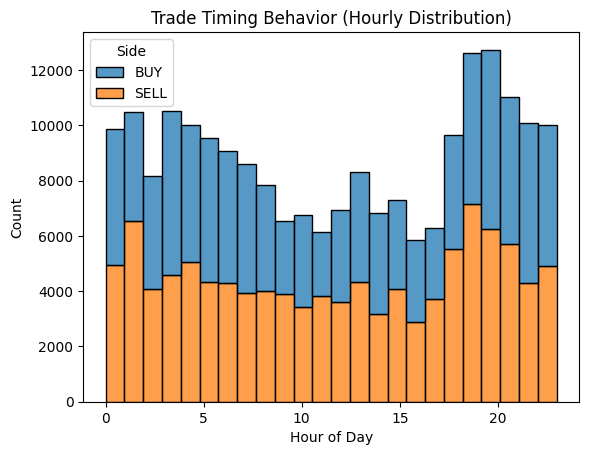

In [50]:
df1['hour'] = pd.to_datetime(df1['Timestamp IST']).dt.hour
sns.histplot(data=df1, x='hour', hue='Side', multiple='stack', bins=24)
plt.title("Trade Timing Behavior (Hourly Distribution)")
plt.xlabel("Hour of Day")
plt.savefig("/content/drive/MyDrive/ds_Komal/outputs/timing_behavior.png")
plt.show()

In [35]:
daily_trades = df1.groupby('Date').agg({
    'Closed PnL': 'mean',
    'Size USD': 'sum',
    'Fee': 'sum',
    'Account': 'nunique',
    'Side': lambda x: x[x.str.lower() == 'buy'].count() / len(x) if len(x) > 0 else 0
}).reset_index()

daily_trades.columns = ['Date', 'avg_PnL', 'total_volume_usd', 'total_fee', 'unique_traders', 'buy_ratio']
daily_trades['Date'] = pd.to_datetime(daily_trades['Date'])

In [15]:
merged_df = pd.merge(daily_trades, df2, left_on='Date', right_on='date', how='inner')


In [39]:
merged_df.head()

,Date,avg_PnL,total_volume_usd,total_fee,unique_traders,buy_ratio,timestamp,value,classification,date,color
0,2023-05-01,0.000000,477.00,0.000000,1,0.0,1682919000,63,Greed,2023-05-01,green
1,2023-12-05,0.000000,50005.83,12.501455,1,0.0,1701754200,75,Extreme Greed,2023-12-05,NaN
2,2023-12-14,-18.675885,113203.35,28.300831,1,0.0,1702531800,72,Greed,2023-12-14,green
3,2023-12-15,-12.316017,10609.95,2.652489,1,0.0,1702618200,70,Greed,2023-12-15,green
4,2023-12-16,0.000000,15348.77,3.837189,1,0.0,1702704600,67,Greed,2023-12-16,green


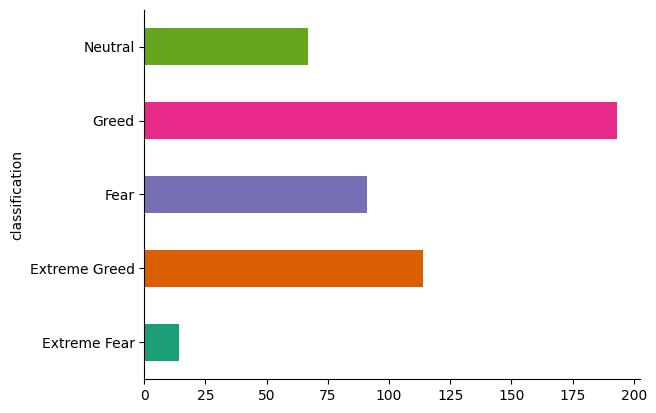

In [51]:
# @title classification

from matplotlib import pyplot as plt
import seaborn as sns
merged_df.groupby('classification').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

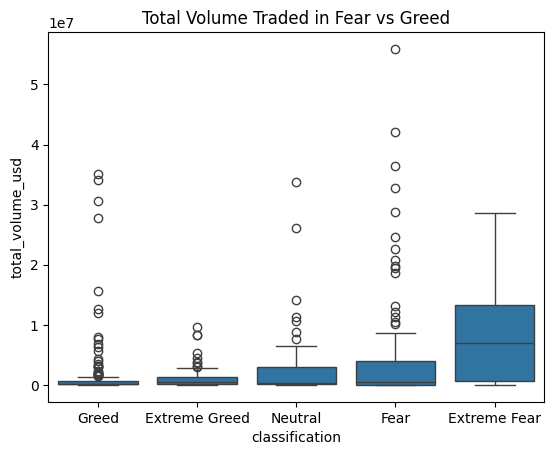

In [32]:
# Compare trading volume
sns.boxplot(x='classification', y='total_volume_usd', data=merged_df)
plt.title("Total Volume Traded in Fear vs Greed")
plt.show()

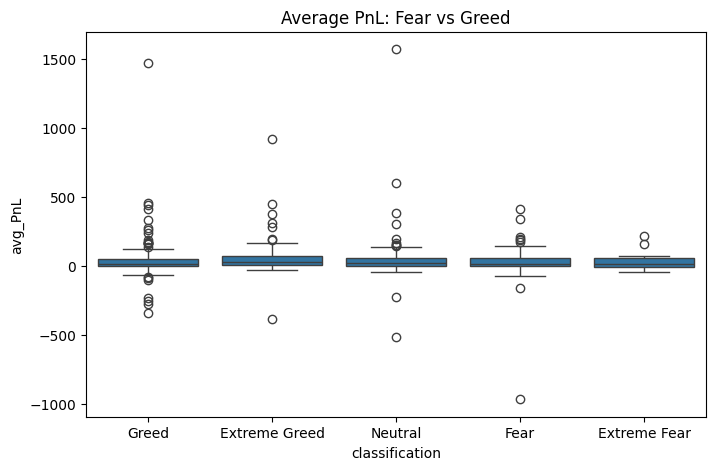

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='classification', y='avg_PnL', data=merged_df)
plt.title("Average PnL: Fear vs Greed")
plt.savefig("/content/drive/MyDrive/ds_Komal/outputs/avg_pnl_classification.png")
plt.show()

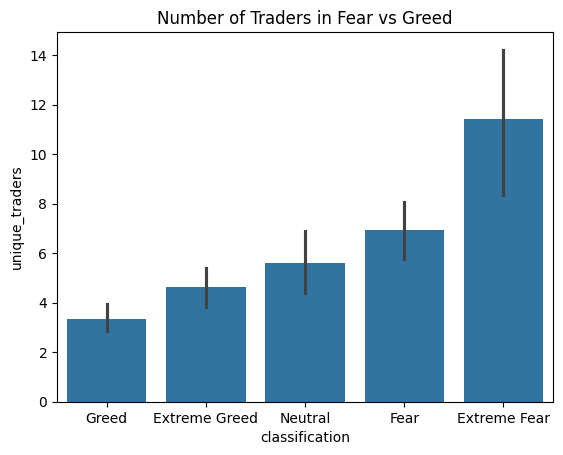

In [52]:
# Compare number of traders
sns.barplot(x='classification', y='unique_traders', data=merged_df)
plt.title("Number of Traders in Fear vs Greed")
plt.savefig("/content/drive/MyDrive/ds_Komal/outputs/number_of_traders.png")
plt.show()

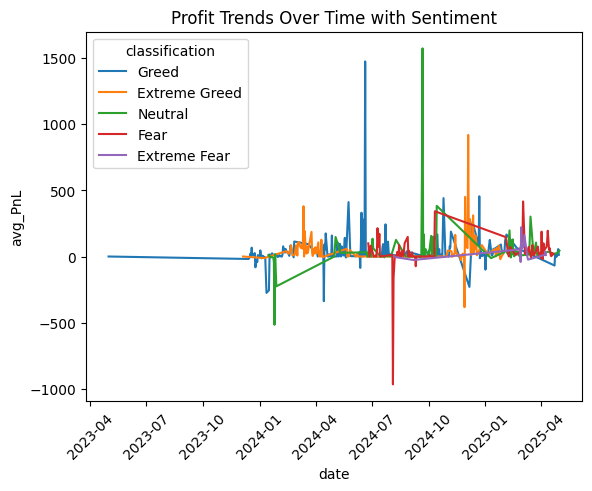

In [46]:
sns.lineplot(data=merged_df, x='date', y='avg_PnL', hue='classification')
plt.title("Profit Trends Over Time with Sentiment")
plt.xticks(rotation=45)
plt.savefig("/content/drive/MyDrive/ds_Komal/outputs/trends_over_time.png")
plt.show()


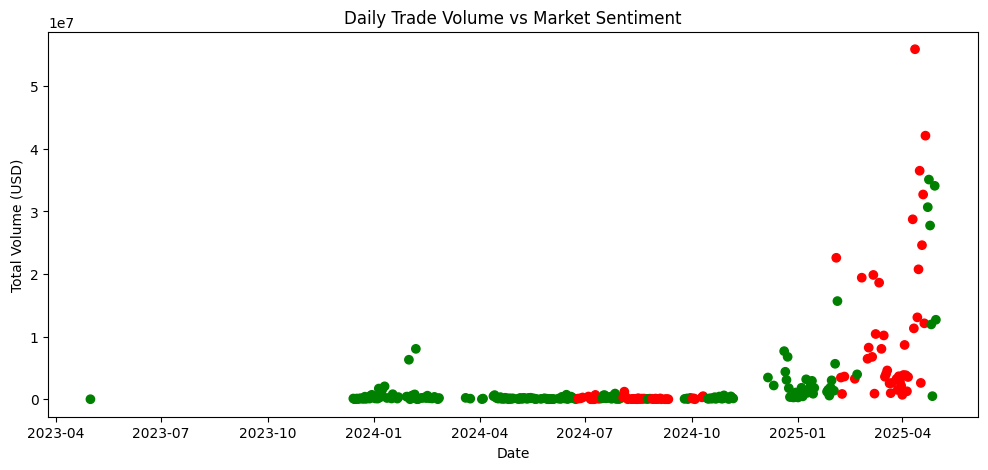

In [26]:
merged_df['color'] = merged_df['classification'].map({'Fear': 'red', 'Greed': 'green'})
plot_df = merged_df.dropna(subset=['color', 'total_volume_usd'])

plt.figure(figsize=(12, 5))
plt.scatter(plot_df['Date'], plot_df['total_volume_usd'], c=plot_df['color'])
plt.title('Daily Trade Volume vs Market Sentiment')
plt.xlabel('Date')
plt.ylabel('Total Volume (USD)')
plt.savefig("/content/drive/MyDrive/ds_Komal/outputs/volume_vs_sentiment.png")
plt.show()


In [27]:
from scipy.stats import ttest_ind

fear_df = merged_df[merged_df['classification'] == 'Fear']
greed_df = merged_df[merged_df['classification'] == 'Greed']

t_stat, p_val = ttest_ind(fear_df['avg_PnL'], greed_df['avg_PnL'])
print("T-test for avg_PnL:", t_stat, p_val)


T-test for avg_PnL: -0.4771190766100233 0.6336468729796365


In [28]:
merged_df.to_csv("/content/drive/MyDrive/final_merged_dataset.csv", index=False)